In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
t1_data: pd.DataFrame = pd.DataFrame()

t1_data["street"] = [80, 98, 75, 91, 78]
t1_data["garage"] = [100, 82, 105, 89, 102]
    
street = t1_data["street"].values
garage = t1_data["garage"].values

corr = t1_data["garage"].corr(t1_data["street"])
# corr.style.background_gradient(cmap='coolwarm')

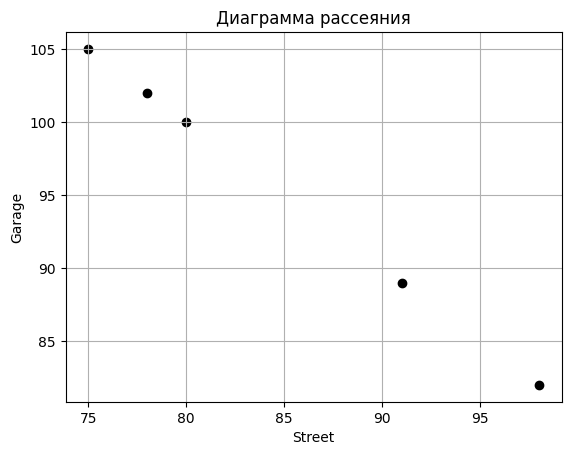

In [4]:
plt.grid(True)
plt.scatter(street, garage, marker = 'o', color = 'black')
plt.xlabel("Street")
plt.ylabel("Garage")
plt.title("Диаграмма рассеяния")
plt.show()

In [5]:
data: pd.DataFrame = pd.read_csv("../elden_ring_steam_reviews.csv")
data

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134238864,english,being killed over and over again is fun,2023-03-07 14:19:11,True,0,0,False,False,False,47,2,355,355,346,2023-03-07 14:29:21
1,134238208,english,I write this review as I have 100% completed E...,2023-03-07 14:03:24,True,0,0,True,False,False,110,2,24238,5823,24238,2023-03-07 02:08:22
2,134238033,english,Fun,2023-03-07 13:59:13,True,0,0,True,False,False,11,1,912,912,881,2023-03-07 14:30:07
3,134237508,english,pretty cool.,2023-03-07 13:46:37,True,0,0,True,False,False,94,8,8497,2914,8497,2023-03-07 13:44:52
4,134236511,english,AMAZINGGGGGGGGGGGGG,2023-03-07 13:20:04,True,0,0,True,False,False,4,1,985,163,923,2023-03-07 14:26:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,131803069,english,Best platformer of the year.,2023-01-29 14:50:25,True,0,0,True,False,False,112,8,12095,1751,7565,2023-03-06 13:54:32
9790,131802918,english,"truly fun...very recommended, worth the money ...",2023-01-29 14:47:55,True,0,0,True,False,False,17,4,9467,39,8394,2023-02-26 17:51:52
9791,131802717,english,mimic is the friend we made along the way,2023-01-29 14:44:41,True,0,0,True,False,False,34,3,8098,6,5655,2023-02-23 10:17:41
9792,131802309,english,"The lands of Elden Ring are vast and wild, fil...",2023-01-29 14:38:38,True,1,0,True,False,False,70,8,9472,201,9191,2023-03-05 13:39:17


In [6]:
from sklearn.calibration import LabelEncoder
import sklearn.preprocessing as preprocessing


encoder = preprocessing.LabelEncoder()
data["review"].fillna("empty", inplace=True)

for column in data.columns:
    if data[column].dtype == 'object':
    # Примените кодирование только к колонкам с типом 'object' (строки)
        data[column] = encoder.fit_transform(data[column])

del data["id"]
del data["steam_purchase"]
del data["language"]
del data["written_during_early_access"]

In [7]:
data.corr().style.background_gradient(cmap='coolwarm')

,review,created,voted_up,votes_up,comment_count,recieved_for_free,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
review,1.000000,-0.023204,0.010953,-0.031305,-0.018181,0.027622,-0.091445,-0.023589,-0.065847,-0.023534,-0.067343,0.004335
created,-0.023204,1.000000,0.011790,-0.021531,-0.019659,0.004237,0.021297,-0.006229,-0.023126,0.238068,0.041075,0.311837
voted_up,0.010953,0.011790,1.000000,-0.017560,-0.125141,-0.001306,-0.041253,-0.055828,0.074437,0.048198,0.065102,0.099385
votes_up,-0.031305,-0.021531,-0.017560,1.000000,0.276951,0.009255,0.012464,0.013080,-0.003382,-0.011928,-0.002120,-0.015617
comment_count,-0.018181,-0.019659,-0.125141,0.276951,1.000000,0.015935,0.018932,0.020453,-0.017191,-0.011493,-0.016541,-0.018678
recieved_for_free,0.027622,0.004237,-0.001306,0.009255,0.015935,1.000000,-0.020406,0.005952,-0.017347,0.011982,-0.020111,-0.009032
author_num_games_owned,-0.091445,0.021297,-0.041253,0.012464,0.018932,-0.020406,1.000000,0.417477,0.048962,-0.022585,0.059616,-0.055043
author_num_reviews,-0.023589,-0.006229,-0.055828,0.013080,0.020453,0.005952,0.417477,1.000000,-0.062666,-0.023522,-0.056269,-0.075365
author_playtime_forever,-0.065847,-0.023126,0.074437,-0.003382,-0.017191,-0.017347,0.048962,-0.062666,1.000000,0.247629,0.974329,0.134603
author_playtime_last_two_weeks,-0.023534,0.238068,0.048198,-0.011928,-0.011493,0.011982,-0.022585,-0.023522,0.247629,1.000000,0.111018,0.587490


In [8]:
coor_data = pd.DataFrame(data.corrwith(data["author_playtime_last_two_weeks"]))
coor_data.corr()
coor_data.style.background_gradient(cmap='coolwarm')

,0
review,-0.023534
created,0.238068
voted_up,0.048198
votes_up,-0.011928
comment_count,-0.011493
recieved_for_free,0.011982
author_num_games_owned,-0.022585
author_num_reviews,-0.023522
author_playtime_forever,0.247629
author_playtime_last_two_weeks,1.000000


In [9]:
corr_matrix = data.corr().author_playtime_last_two_weeks.to_frame().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

,author_playtime_last_two_weeks
review,-0.020000
created,0.240000
voted_up,0.050000
votes_up,-0.010000
comment_count,-0.010000
recieved_for_free,0.010000
author_num_games_owned,-0.020000
author_num_reviews,-0.020000
author_playtime_forever,0.250000
author_playtime_last_two_weeks,1.000000


Реализовать регрессию вручную, отобразить наклон, сдвиг и MS

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
x = np.array(data[["author_last_played"]], type(float))
y = np.array(data["author_playtime_last_two_weeks"], type(float))
model.fit(x, y)

LinearRegression()

In [12]:
data["author_playtime_forever"].mean()

8534.752195221565

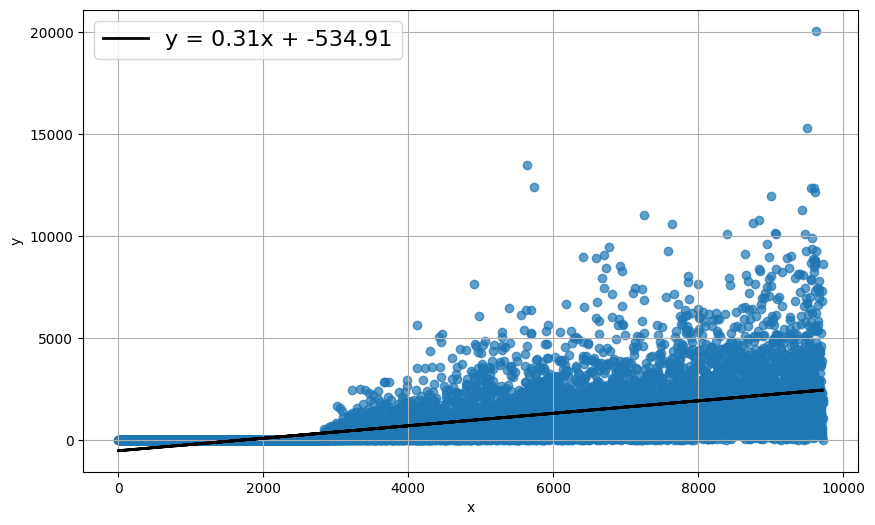

In [13]:
model_a = model.coef_[0]
model_b = model.intercept_

model_y_sk = model_a * x + model_b

fig = plt.figure(figsize=(10, 6))
x = np.array(data["author_last_played"], type(float))
plt.plot(x, model_y_sk, linewidth=2, color='black', label=f'y = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(x, y, alpha=0.7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(prop={'size': 16})
plt.show()

In [14]:
import sklearn.metrics as metrics

metrics.mean_squared_error(model_y_sk, y)

1408992.675415211

In [15]:
ins_data : pd.DataFrame = pd.read_csv("insurance.csv")
ins_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
print(ins_data.isna().sum())
print(ins_data["region"].unique())
value_dict = {
    1: "southwest",
    2 : "southeast",
    3: "northwest",
    4: "northeast",
    "male": 1,
    "female": 2,
    "yes": 1,
    "no": 2
    
}

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
['southwest' 'southeast' 'northwest' 'northeast']


In [17]:
# ins_data["sex"] = ins_data["sex"].map(value_dict)
# ins_data["smoker"] = ins_data["smoker"].map(value_dict)
# ins_data["region"] = ins_data["region"].map(value_dict)
ins_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
groups = ins_data.groupby("region").groups
southwest = ins_data["bmi"][groups["southwest"]]
southeast = ins_data["bmi"][groups["southeast"]]
northwest = ins_data["bmi"][groups["northwest"]]
northeast = ins_data["bmi"][groups["northeast"]]
stats.f_oneway(southwest, southeast, northwest, northeast)

F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)

In [20]:
model = smf.ols('bmi ~ region', data=ins_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
region,4055.880631,3.0,39.495057,1.881839e-24
Residual,45664.319755,1334.0,NaN,NaN


In [21]:
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.sandbox.stats.multicomp import multipletests

region_pairs = []
bmi = ins_data['bmi']
for r1 in range(3):
    for r2 in range(r1 + 1, 4):
        region_pairs.append((r1 + 1, r2 + 1))

m_value = len(region_pairs)
alpha = 0.05 / m_value

print(alpha)
for r1, r2 in region_pairs:
    print(r1, r2)
    statistic, p_value = stats.ttest_ind(bmi[groups[value_dict[r1]]], bmi[groups[value_dict[r2]]])
    accepted = "Принято" if p_value > alpha else "Отклонено"
    print(stats.ttest_ind(bmi[groups[value_dict[r1]]], bmi[groups[value_dict[r2]]]), accepted)

0.008333333333333333
1 2
TtestResult(statistic=-5.908373821545118, pvalue=5.4374009639680636e-09, df=687.0) Отклонено
1 3
TtestResult(statistic=3.2844171500398582, pvalue=0.001076958496307695, df=648.0) Отклонено
1 4
TtestResult(statistic=3.1169000930045923, pvalue=0.0019086161671573074, df=647.0) Отклонено
2 3
TtestResult(statistic=9.25649013552548, pvalue=2.643571405230106e-19, df=687.0) Отклонено
2 4
TtestResult(statistic=8.790905562598699, pvalue=1.186014937424813e-17, df=686.0) Отклонено
3 4
TtestResult(statistic=0.060307727183293185, pvalue=0.951929170821864, df=647.0) Принято


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0263,0.9999,-1.1552,1.2078,False
northeast,southeast,4.1825,0.0,3.033,5.332,True
northeast,southwest,1.4231,0.0107,0.2416,2.6046,True
northwest,southeast,4.1562,0.0,3.0077,5.3047,True
northwest,southwest,1.3968,0.0127,0.2162,2.5774,True
southeast,southwest,-2.7594,0.0,-3.9079,-1.6108,True


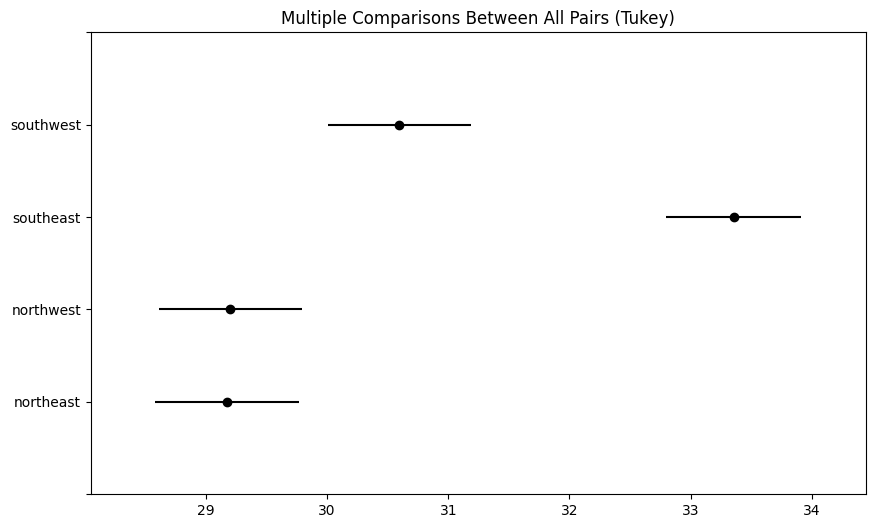

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=ins_data["bmi"], groups=ins_data["region"], alpha=0.05)
tukey.plot_simultaneous()
plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color='red')
tukey.summary()

In [23]:
model = smf.ols('bmi ~ region + sex + region:sex', data=ins_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
region,4034.975135,3.0,39.398134,2.163195e-24
sex,86.007035,1.0,2.519359,1.126940e-01
region:sex,174.157808,3.0,1.700504,1.650655e-01
Residual,45404.154911,1330.0,NaN,NaN


In [24]:
ins_data["combo"] = ins_data["region"] + "/" + ins_data["sex"]

group1,group2,meandiff,p-adj,lower,upper,reject
northeast/female,northeast/male,-0.2998,0.9998,-2.2706,1.6711,False
northeast/female,northwest/female,-0.0464,1.0,-2.0142,1.9215,False
northeast/female,northwest/male,-0.2042,1.0,-2.1811,1.7728,False
northeast/female,southeast/female,3.3469,0.0,1.41,5.2839,True
northeast/female,southeast/male,4.6657,0.0,2.7634,6.568,True
northeast/female,southwest/female,0.7362,0.9497,-1.2377,2.71,False
northeast/female,southwest/male,1.8051,0.1007,-0.1657,3.776,False
northeast/male,northwest/female,0.2534,0.9999,-1.7083,2.2152,False
northeast/male,northwest/male,0.0956,1.0,-1.8752,2.0665,False
northeast/male,southeast/female,3.6467,0.0,1.7159,5.5775,True


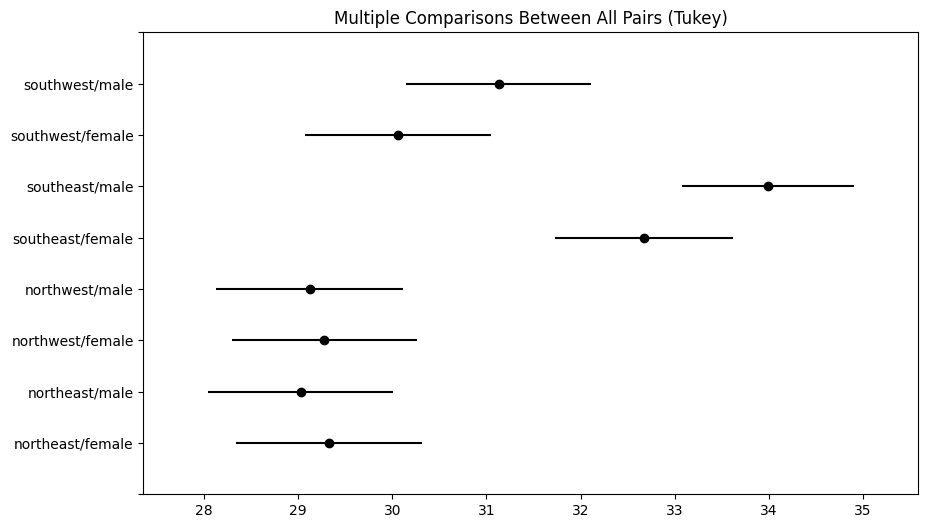

In [25]:
tukey = pairwise_tukeyhsd(endog=ins_data["bmi"], groups=ins_data["combo"], alpha=0.05)
tukey.plot_simultaneous()
# plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color='red')
tukey.summary()